## **TALOS_ANALYSIS**

The main purpose of this notebook is briefly analyze the results obtained from talos_optimization.py script to find the best architecture for the Neural Network, both for masking and non masking procedures.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set either *masking* = **True** or *masking* = **False** depending on the procedure used

In [2]:
masking = True

Importing .csv files from *./talos_results* (both $LH$ and $z$ fixed optimization)

In [3]:
if masking:
    df_LH = pd.read_csv('./talos_results/LH fixed masking.csv', sep=',')
    df_z = pd.read_csv('./talos_results/z fixed masking.csv', sep=',')
else:
    df_LH = pd.read_csv('./talos_results/LH fixed NO masking.csv', sep=',')
    df_z = pd.read_csv('./talos_results/z fixed NO masking.csv', sep=',')

In [4]:
df_LH.head(10)

,round_epochs,loss,val_loss,nr_layers,hidden_layer_size,activation,dropout,lr
0,100,0.804623,0.851764,3,16,ReLU(),0.05,0.010
1,100,8.127239,8.295466,3,16,ReLU(),0.05,0.001
2,100,0.938892,0.921329,3,16,ReLU(),0.10,0.010
3,100,9.460602,9.918085,3,16,ReLU(),0.10,0.001
4,100,0.663802,0.699215,3,16,LeakyReLU(negative_slope=0.01),0.05,0.010
5,100,14.595005,14.626503,3,16,LeakyReLU(negative_slope=0.01),0.05,0.001
6,100,0.925914,0.824311,3,16,LeakyReLU(negative_slope=0.01),0.10,0.010
7,100,27.830957,27.846204,3,16,LeakyReLU(negative_slope=0.01),0.10,0.001
8,100,0.694488,0.849021,3,32,ReLU(),0.05,0.010
9,100,25.148198,25.139751,3,32,ReLU(),0.05,0.001


In [5]:
df_z.head(10)

,Unnamed: 0,round_epochs,loss,val_loss,nr_layers,hidden_layer_size,activation,dropout,lr
0,0,100,0.720205,0.965104,3,16,ReLU(),0.05,0.010
1,1,100,21.485518,21.504182,3,16,ReLU(),0.05,0.001
2,2,100,0.558336,0.711452,3,16,ReLU(),0.10,0.010
3,3,100,12.559784,14.867688,3,16,ReLU(),0.10,0.001
4,4,100,0.742439,1.128694,3,16,LeakyReLU(negative_slope=0.01),0.05,0.010
5,5,100,12.237422,13.134993,3,16,LeakyReLU(negative_slope=0.01),0.05,0.001
6,6,100,0.876436,1.612212,3,16,LeakyReLU(negative_slope=0.01),0.10,0.010
7,7,100,14.841354,15.650480,3,16,LeakyReLU(negative_slope=0.01),0.10,0.001
8,8,100,0.668755,0.694709,3,32,ReLU(),0.05,0.010
9,9,100,7.164705,9.021331,3,32,ReLU(),0.05,0.001


Sort in ascending order according to the values of *val_loss*

In [6]:
df_LH.sort_values(by = 'val_loss', ascending = True, inplace=True)
df_z.sort_values(by='val_loss', ascending=True, inplace=True)

Visualize the architecture with the best value of *val_loss*

In [11]:
#LH FIXED SCENARIO
print('The lowest val_loss ({}) is obtained with the following architecture\n nr_layers: {}\n hidden_layer_size: {}\n activation: {}\n dropout: {}\n lr: {}'.format(df_LH.iloc[0]['val_loss'], df_LH.iloc[0]['nr_layers'], 
df_LH.iloc[0]['hidden_layer_size'], df_LH.iloc[0]['activation'],df_LH.iloc[0]['dropout'], df_LH.iloc[0]['lr']) )

The lowest val_loss (0.4143856507560381) is obtained with the following architecture
 nr_layers: 4
 hidden_layer_size: 16
 activation: ReLU()
 dropout: 0.05
 lr: 0.01


In [12]:
#z FIXED SCENARIO
print('The lowest val_loss ({}) is obtained with the following architecture\n nr_layers: {}\n hidden_layer_size: {}\n activation: {}\n dropout: {}\n lr: {}'.format(df_z.iloc[0]['val_loss'], df_z.iloc[0]['nr_layers'], 
df_z.iloc[0]['hidden_layer_size'], df_z.iloc[0]['activation'],df_z.iloc[0]['dropout'], df_z.iloc[0]['lr']))

The lowest val_loss (0.335910194446153) is obtained with the following architecture
 nr_layers: 4
 hidden_layer_size: 16
 activation: LeakyReLU(negative_slope=0.01)
 dropout: 0.1
 lr: 0.01


##### **GRAPHICAL VISUALIZATION OF ARCHITECTURES** 

###### **LH FIXED SCENARIO**

In [13]:
list1=list(df_LH.index)
list2=list(round(df_LH['val_loss'],3))

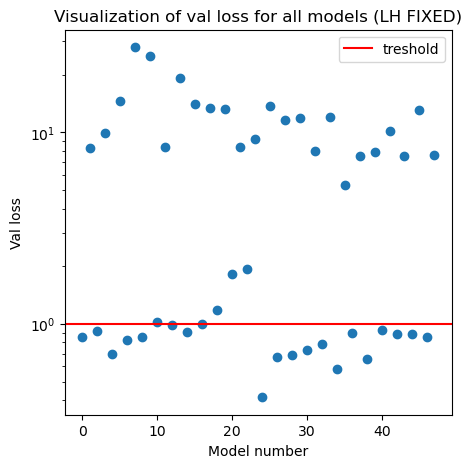

In [17]:
figure = plt.figure(figsize=(5, 5))
plt.axhline(y=1, color='r', label='treshold')
plt.scatter(list1, list2)
plt.ylabel("Val loss")
plt.xlabel("Model number")
plt.yscale('log')
plt.title("Visualization of val loss for all models (LH FIXED)")
plt.legend()
plt.show()

###### **Z FIXED SCENARIO**

In [18]:
list1=list(df_z.index)
list2=list(round(df_z['val_loss'],3))

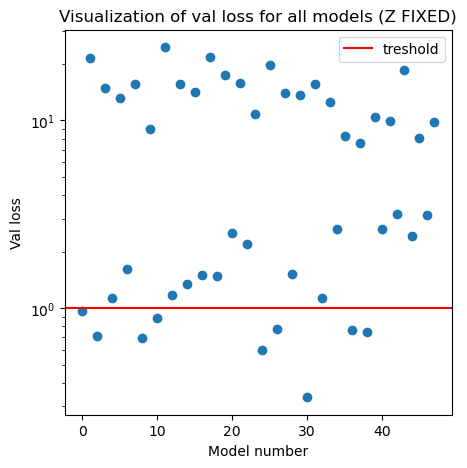

In [19]:
figure = plt.figure(figsize=(5, 5))
plt.axhline(y=1, color='r', label='treshold')
plt.scatter(list1, list2)
plt.ylabel("Val loss")
plt.xlabel("Model number")
plt.yscale('log')
plt.title("Visualization of val loss for all models (Z FIXED)")
plt.legend()
plt.show()

### FINDING THE BEST MODEL

At this point, it is necessary manually looking for a model that performs well in both scenarios (namely $LH$ fixed and $z$ fixed).

###### **Note**: our aim is to minimize the validation loss, our definition of a 'good model' is based on the value of this metrics

In [20]:
df_LH.head(10)

,round_epochs,loss,val_loss,nr_layers,hidden_layer_size,activation,dropout,lr
24,100,0.387257,0.414386,4,16,ReLU(),0.05,0.01
34,100,0.515241,0.582551,4,32,ReLU(),0.10,0.01
38,100,0.462871,0.654601,4,32,LeakyReLU(negative_slope=0.01),0.10,0.01
26,100,0.463585,0.667613,4,16,ReLU(),0.10,0.01
28,100,0.559628,0.691223,4,16,LeakyReLU(negative_slope=0.01),0.05,0.01
4,100,0.663802,0.699215,3,16,LeakyReLU(negative_slope=0.01),0.05,0.01
30,100,0.616079,0.728194,4,16,LeakyReLU(negative_slope=0.01),0.10,0.01
32,100,0.687553,0.782148,4,32,ReLU(),0.05,0.01
6,100,0.925914,0.824311,3,16,LeakyReLU(negative_slope=0.01),0.10,0.01
46,100,0.612443,0.848826,4,64,LeakyReLU(negative_slope=0.01),0.10,0.01


In [21]:
df_z.head(10)

,Unnamed: 0,round_epochs,loss,val_loss,nr_layers,hidden_layer_size,activation,dropout,lr
30,32,100,0.332801,0.335910,4,16,LeakyReLU(negative_slope=0.01),0.10,0.01
24,24,100,0.323283,0.599804,4,16,ReLU(),0.05,0.01
8,8,100,0.668755,0.694709,3,32,ReLU(),0.05,0.01
2,2,100,0.558336,0.711452,3,16,ReLU(),0.10,0.01
38,40,100,0.367056,0.749565,4,32,LeakyReLU(negative_slope=0.01),0.10,0.01
36,38,100,0.389379,0.769233,4,32,LeakyReLU(negative_slope=0.01),0.05,0.01
26,28,100,0.323433,0.778128,4,16,ReLU(),0.10,0.01
10,10,100,0.694289,0.891561,3,32,ReLU(),0.10,0.01
0,0,100,0.720205,0.965104,3,16,ReLU(),0.05,0.01
4,4,100,0.742439,1.128694,3,16,LeakyReLU(negative_slope=0.01),0.05,0.01
